

# Predicting "Greenness" Of Content




This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

In [155]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

### 1. Load the data
- Note it is a `.tsv` file and has a tab separator instead of comma.
- Clean the `is_news` column.
- Make two new columns, `title` and `body`, from the `boilerplate` column.

> **Note:** The `boilerplate` column is in json dictionary format. You can use the `json.loads()` function from the `json` module to convert this into a python dictionary.

In [156]:
df = pd.read_csv('data/train.tsv', sep = '\t')

In [157]:
df.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [158]:
df.is_news.value_counts()

1    4552
?    2843
Name: is_news, dtype: int64

In [159]:
df['is_news'] = df.is_news.map({'?': 0, '1': 1})

In [160]:
df.is_news.value_counts()

1    4552
0    2843
Name: is_news, dtype: int64

In [161]:
t = []
b = []
for i in df.boilerplate:
    title = json.loads(i).get('title')
    body = json.loads(i).get('body')
    t.append(title)
    b.append(body)
    
df['title'] = t
df['body'] = b

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 29 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

In [163]:
df[['title', 'body']].head()

,title,body
0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


### 2. What are 'evergreen' sites?
- These are websites that always relevant like recipes or reviews (as opposed to current events).
- Stored as a binary indicator in the `label` column.
- Look at some examples.

In [164]:
y = df.label
y.value_counts()

1    3796
0    3599
Name: label, dtype: int64

### 3. Does being a news site affect green-ness?

**3.A Investigate with plots/EDA.**

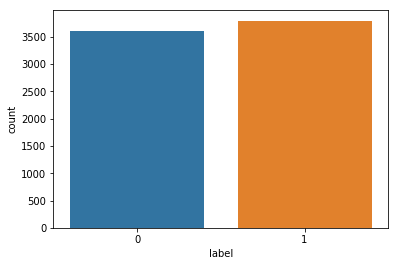

In [165]:
sns.countplot(y)

In [166]:
X = df.is_news.values.reshape(-1,1)

 **3.B Develop a Model using the `LogisticRegression` class in sklearn.**



In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [169]:
from sklearn.model_selection import cross_val_score

In [170]:
lr = LogisticRegression()

In [171]:
cross_val_score(lr, X_train, y_train, cv = 5)

array([0.51441441, 0.51397656, 0.51397656, 0.51397656, 0.51397656])

**3.C Interpret the results of your model.**

In [172]:
from sklearn.model_selection import cross_val_predict

In [173]:
predict = cross_val_predict(lr, X_train,y_train,cv = 5)

In [174]:
from sklearn.metrics import confusion_matrix

In [175]:
confusion_matrix(y_train, predict)

array([[   0, 2695],
       [   0, 2851]])

### 4. Does the website category affect green-ness?

**4.A Investigate with plots/EDA.**

In [176]:
df.columns

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label', 'title',
       'body'],
      dtype='object')

In [177]:
df['alchemy_category'].head()

0      business
1    recreation
2        health
3        health
4        sports
Name: alchemy_category, dtype: object

In [178]:
df.groupby('alchemy_category').mean()['label']

alchemy_category
?                     0.502135
arts_entertainment    0.371945
business              0.711364
computer_internet     0.246622
culture_politics      0.457726
gaming                0.368421
health                0.573123
law_crime             0.419355
recreation            0.684296
religion              0.416667
science_technology    0.456747
sports                0.205263
unknown               0.333333
weather               0.000000
Name: label, dtype: float64

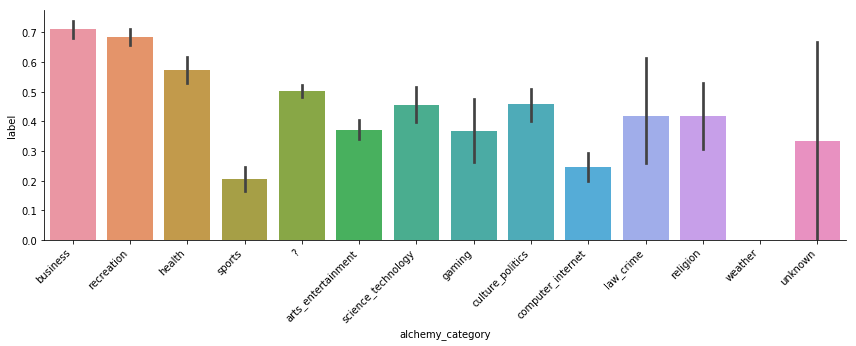

In [179]:
sns.factorplot(x='alchemy_category', y='label', 
               data=df, kind='bar', aspect=3).set_xticklabels(rotation=45, horizontalalignment='right')

### Getting Started

We want to consider the relationships of each category to evergreen status.  Thus, we will start by examining whether or not 

In [207]:
dummies = pd.get_dummies(df.alchemy_category, drop_first=True)
y = df.label

In [222]:
X= dummies['business'].values.reshape(-1,1)

In [223]:
X_train,X_test, y_train, y_test = train_test_split(X, y)

In [224]:
X_train.shape

(5546, 1)

In [225]:
y_train.shape

(5546,)

**4.B Examine with a logistic regression.**

In [226]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = cross_val_predict(lr, X_train, y_train, cv = 5)
confusion_matrix(predictions, y_train)

array([[2486, 2393],
       [ 190,  477]])

**4.C Interpret the model results.**

In [227]:
from sklearn.metrics import accuracy_score, precision_score, classification_report

In [228]:
accuracy_score(predictions, y_train)

0.5342589253516048

In [229]:
print(classification_report(predictions, y_train))

             precision    recall  f1-score   support

          0       0.93      0.51      0.66      4879
          1       0.17      0.72      0.27       667

avg / total       0.84      0.53      0.61      5546

